In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_logre=pd.read_csv('HR_comma_sep.csv')
df_logre.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [22]:
df_dummy=pd.get_dummies(df_logre.salary)
df_dummy

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [38]:
mixed_df=pd.concat([df_logre,df_dummy],axis='columns')
mixed_df=mixed_df.drop('salary',axis='columns')
mixed_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,0,1,0


<BarContainer object of 14999 artists>

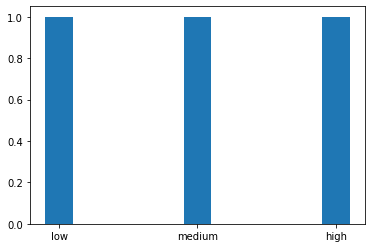

In [29]:
plt.bar(df_logre.salary,df_logre.left,width=0.2)


<BarContainer object of 14999 artists>

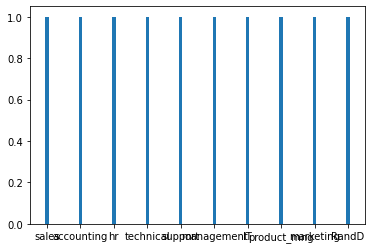

In [30]:
plt.bar(df_logre.Department,df_logre.left,width=0.1)

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
lro=LogisticRegression()

In [76]:
X=mixed_df.drop(['last_evaluation','number_project','time_spend_company','Work_accident','left','Department'],axis='columns')
X

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [77]:
y=df_logre.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.1)

In [80]:
lro.fit(X_train,y_train)

LogisticRegression()

In [81]:
lro.predict(X_test)

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [82]:
y_test

3239     0
13177    0
2003     0
2322     0
10565    0
        ..
6960     0
9214     0
6214     0
12594    1
1876     1
Name: left, Length: 1500, dtype: int64

In [83]:
lro.predict([[0.30,6,0,0,1,0]])

array([0], dtype=int64)

In [84]:
lro.predict([[0.40,6,1,1,0,0]])

array([0], dtype=int64)

In [85]:
lro.score(X_test,y_test)

0.7813333333333333